In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

from sklearn.utils import resample,shuffle
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

In [84]:
churn_df = pd.read_csv('Customer_Churn.csv')
churn_df.head()

,Gender,Age,Married,Number_of_Dependent,Number_of_Referrals,Phone_Service,Avg_Monthly_Long_Distance_charges,Multiple_Lines,Internet_Service,Internet_Type,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_charges,Total_Refunds,Total_Extra_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,37,Yes,0,2,Yes,42.39,No,Yes,Cable,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0.0,381.51,974.81,0
1,Male,46,No,0,0,Yes,10.69,Yes,Yes,Cable,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10.0,96.21,610.28,0
2,Male,50,No,0,0,Yes,33.65,No,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0.0,134.60,415.45,1
3,Male,78,Yes,0,1,Yes,27.82,No,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0.0,361.66,1599.51,1
4,Female,75,Yes,0,3,Yes,7.38,No,Yes,Fiber Optic,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0.0,22.14,289.54,1


In [85]:
churn_df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependent                     0
Number_of_Referrals                     0
Phone_Service                           0
Avg_Monthly_Long_Distance_charges       0
Multiple_Lines                          0
Internet_Service                        0
Internet_Type                        1344
Avg_Monthly_GB_Download                 0
Online_Security                         0
Online_Backup                           0
Device_Protection_Plan                  0
Premium_Tech_Support                    0
Streaming_TV                            0
Streaming_Movies                        0
Streaming_Music                         0
Unlimited_Data                          0
Contract                                0
Paperless_Billing                       0
Payment_Method                          0
Monthly_Charge                          0
Total_charges                     

In [127]:

#Replacing Null valuses with None
churn_df['Internet_Type'].fillna(value="None",inplace=True)

In [87]:
churn_df.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number_of_Dependent                  0
Number_of_Referrals                  0
Phone_Service                        0
Avg_Monthly_Long_Distance_charges    0
Multiple_Lines                       0
Internet_Service                     0
Internet_Type                        0
Avg_Monthly_GB_Download              0
Online_Security                      0
Online_Backup                        0
Device_Protection_Plan               0
Premium_Tech_Support                 0
Streaming_TV                         0
Streaming_Movies                     0
Streaming_Music                      0
Unlimited_Data                       0
Contract                             0
Paperless_Billing                    0
Payment_Method                       0
Monthly_Charge                       0
Total_charges                        0
Total_Refunds                        0
Total_Extra_Charges      

## Handle Imbalance Dataset
Imbalanced data refers to a situation in a dataset where the distribution of classes (target variable) is not equal — one class occurs much more frequently than the other(s) To Resolve this we'll use Resampling methods where we'll either undersamplr the majority cloass or undersample the minority class . In this project i will oversample the minority class

In [88]:
df_minority = churn_df[churn_df['Customer_Status']==1]
df_majority = churn_df[churn_df['Customer_Status']==0]

In [89]:
len(df_majority)

4720

In [90]:
len(df_minority)

1869

In [91]:
df_upsample = resample(df_minority, n_samples=3700,replace=True,random_state=42)

In [92]:
len(df_upsample)

3700

In [93]:
churn_resample_df = pd.concat([df_upsample,df_majority])
churn_resample_df =shuffle(churn_resample_df)

In [94]:
y = churn_resample_df['Customer_Status']
x = churn_resample_df.drop(columns=['Customer_Status'])

In [95]:
cat_cols = x.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Married', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'],
      dtype='object')

In [96]:
num_cols = x.select_dtypes(exclude='object').columns
num_cols

Index(['Age', 'Number_of_Dependent', 'Number_of_Referrals',
       'Avg_Monthly_Long_Distance_charges', 'Avg_Monthly_GB_Download',
       'Monthly_Charge', 'Total_charges', 'Total_Refunds',
       'Total_Extra_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

### split Dataset

In [97]:
X_train, X_test ,Y_train,Y_test= train_test_split(x,y,random_state=42,test_size=0.2)

### Feature Scaling
Feature scaling is a data preprocessing technique used in machine learning to normalize the range of independent variables or features within a dataset. The primary goal is to transform the values of different features to a similar scale, preventing any single feature from disproportionately influencing the model's learning process. This is particularly important for machine learning algorithms that are sensitive to the magnitude and units of features.In this section, i will use the MinMax scaler.his method scales the data to a fixed range, typically between 0 and 1. It is useful when the data does not have a Gaussian (bell curve) distribution ie there are presence of outliers

In [98]:
scaler = MinMaxScaler()
X_train[num_cols]= scaler.fit_transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

### Feature Encoding

In [99]:
for col in cat_cols:
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

    # Fit on training, transform both
    train_encoded = encoder.fit_transform(X_train[[col]])
    test_encoded  = encoder.transform(X_test[[col]])

    # Convert to DataFrames
    train_df = pd.DataFrame(train_encoded.toarray(),
                            columns=encoder.get_feature_names_out([col]),
                            index=X_train.index)

    test_df = pd.DataFrame(test_encoded.toarray(),
                           columns=encoder.get_feature_names_out([col]),
                           index=X_test.index)

    # Replace original column with encoded columns
    X_train = pd.concat([X_train.drop(col, axis=1), train_df], axis=1)
    X_test  = pd.concat([X_test.drop(col, axis=1), test_df], axis=1)

### Model Selection

In [100]:
models = {"Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "XGB": XGBClassifier()}

In [101]:
cv_scores = []
for model in models.values():
    kf =KFold(n_splits=6,shuffle=True,random_state=42)
    cv_result = cross_val_score(model,X=X_train,y=Y_train,cv=kf,n_jobs=-1)
    cv_scores.append(cv_result)

C:\Users\godsp\AppData\Local\Temp\ipykernel_21892\728574388.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_scores,labels=models.keys())


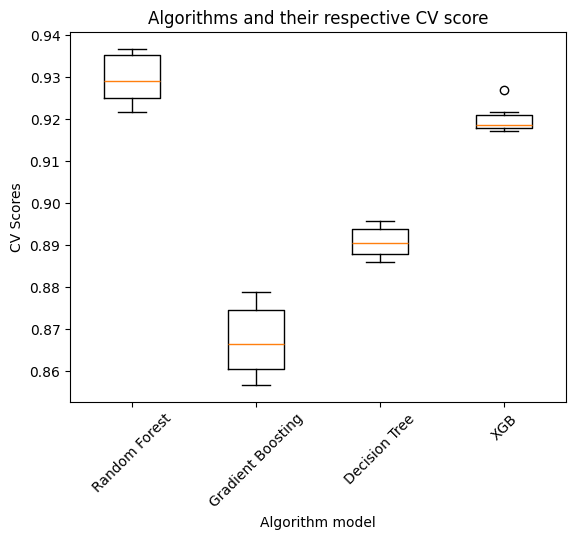

In [102]:
plt.figure(dpi=100)
plt.title('Algorithms and their respective CV score')
plt.xlabel("Algorithm model")
plt.ylabel("CV Scores")
plt.xticks(rotation=45)
plt.boxplot(cv_scores,labels=models.keys())
plt.show()

This box plot compares the performance of four different machine learning algorithms using cross-validation (CV) scores. The Random Forest and XGBoost algorithms have the highest median CV scores, indicating superior performance in predicting customer churn. Decision Tree and Gradient Boosting have lower scores, with Gradient Boosting showing the lowest median performance. This suggests that tree-based ensemble methods are highly effective for this problem.

### parameter Tuning

In [103]:
Rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [60,50,100,120,150],
              'max_depth':[2,4,6,8],
               'criterion':['gini','entropy', 'log_loss']}

In [104]:
grid_model = GridSearchCV(param_grid=param_grid,estimator=Rf_model,cv=5,n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_model= grid_model.best_estimator_
best_model

RandomForestClassifier(max_depth=8, n_estimators=120)

In [105]:
best_model.score(X_test,Y_test)

0.8770783847980997

In [106]:
y_pred = best_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], shape=(1684,))

#### Model Evaluation

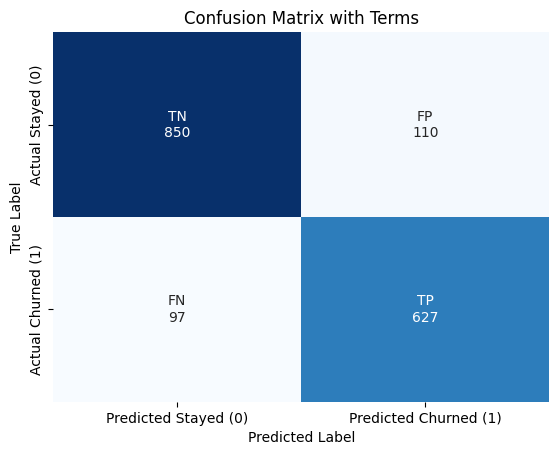

In [147]:
# Generate confusion matrix
cm = confusion_matrix(y_true=Y_test, y_pred=y_pred)

# Labels in the same order as cm.ravel() → [TN, FP, FN, TP]
group_names = ["TN", "FP", "FN", "TP"]

# Flatten cm and pair with labels
labels = [f"{name}\n{value}" for name, value in zip(group_names, cm.flatten())]

# Reshape back to matrix shape
labels = np.array(labels).reshape(2,2)

plt.figure(dpi=100)
plt.title("Confusion Matrix with Terms")
sns.heatmap(cm, annot=labels, fmt="",cmap="Blues", cbar=False,
            xticklabels=["Predicted Stayed (0)", "Predicted Churned (1)"],
            yticklabels=["Actual Stayed (0)", "Actual Churned (1)"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [107]:
print(classification_report(y_pred=y_pred,y_true=Y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       960
           1       0.85      0.87      0.86       724

    accuracy                           0.88      1684
   macro avg       0.87      0.88      0.87      1684
weighted avg       0.88      0.88      0.88      1684



**Performance Metrics**

* Precision (0.90 for Stayed, 0.85 for Churned)

When the model predicts a customer will churn, it’s correct 85% of the time.

When it predicts a customer will stay, it’s correct 90% of the time.

* Recall (0.89 for Stayed, 0.87 for Churned)

The model captures 87% of actual churners, which is very good because missing churners is costly.

It captures 89% of actual stayers too.

* F1-score (0.89 vs. 0.86)

Balances precision and recall. Both classes are strong, with churners slightly lower but still solid.

* Accuracy (0.88)

Overall, the model predicts correctly 88% of the time.

**insights**

The model is well-balanced between detecting churners and non-churners.

A recall of 87% for churners means the model is effective at identifying customers at risk of leaving, which is crucial for churn prevention.

The slight gap between classes shows the model is a bit better at predicting stayers than churners, but still strong.

* Bottom line: This is a high-performing model, especially in recall for churners, making it suitable for proactive retention strategies.

Would you like me to also create a confusion matrix visualization so you can see exactly how many churners were correctly and incorrectly predicted?

In [108]:
feature_importance = pd.DataFrame({'Features':X_train.columns,'Coef':best_model.feature_importances_}).sort_values(by='Coef',ascending=False)
feature_importance

,Features,Coef
2,Number_of_Referrals,0.138397
10,Total_Revenue,0.135307
6,Total_charges,0.129238
28,Contract_Two Year,0.127905
9,Total_Long_Distance_Charges,0.066851
5,Monthly_Charge,0.053340
27,Contract_One Year,0.045405
1,Number_of_Dependent,0.040506
17,Internet_Type_Fiber Optic,0.037513
4,Avg_Monthly_GB_Download,0.029328


C:\Users\godsp\AppData\Local\Temp\ipykernel_21892\100392609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance,y='Features',x='Coef',palette='Blues_r')


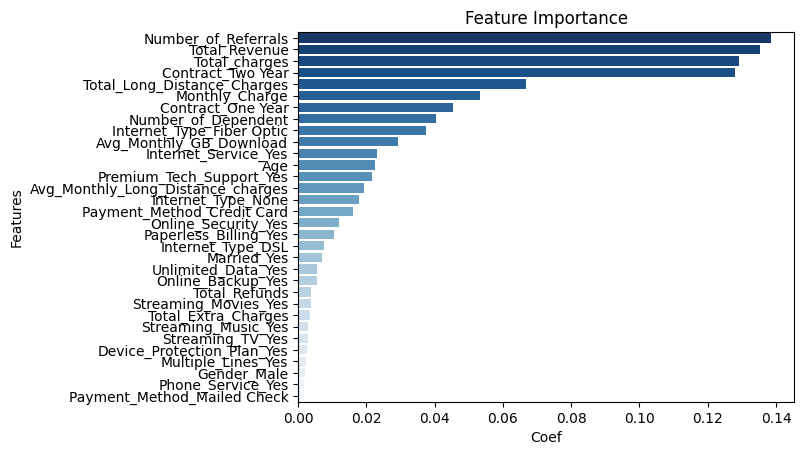

In [136]:
plt.figure(dpi=100)
plt.title('Feature Importance')
sns.barplot(data=feature_importance,y='Features',x='Coef',palette='Blues_r')
plt.show()

**Key Findings:**

Top Drivers of Churn:

* Number of Referrals – customers who were referred seem to behave differently, making referrals a strong predictor.

* Total Revenue & Total Charges – overall spending is a major indicator. Customers contributing more revenue may behave differently in churn likelihood.

* Contract (Two Year, One Year) – longer-term contracts reduce churn risk, while month-to-month contracts are riskier.

* Monthly Charge & Long Distance Charges – higher recurring charges and call costs are closely tied to churn.

**Moderate Influence Factors:**

* Dependents, Internet Type (Fiber Optic), Service usage (GB download, Tech Support, Online Security) – customer demographics and service experience also play roles.

**Weaker Predictors:**

* Gender, Phone Service, Payment Method (Mailed Check), Streaming Services – these variables have very little predictive power.

**Key Insight:**
Customer churn is mainly influenced by contract type, overall spending, and service usage patterns, while demographic features like gender or marital status have little impact.

### Prediction

In [110]:
conn_server =(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=GODSPOWER;'
    'DATABASE=telecom_customer_churn;'
    'Trusted_Connection=yes;'
)

query = "select * from gold.customer_Joined;"  # replace with your table
with pyodbc.connect(conn_server) as conn:
    original_df = pd.read_sql(query, conn)
    
original_df.head()

C:\Users\godsp\AppData\Local\Temp\ipykernel_21892\2995208711.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  original_df = pd.read_sql(query, conn)


,Customer_id,Gender,Age,Married,Number_of_Dependent,City,Zipcode,Latitude,Longitude,Number_of_Referrals,...,Monthly_Charge,Total_charges,Total_Refunds,Total_Extra_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Population
0,0021-IKXGC,Female,72,No,0,San Marcos,92078,33.119028,-117.166036,0,...,72.10,72.1,0.0,0.0,7.77,79.87,Joined,None,None,6760
1,0030-FNXPP,Female,22,No,0,Keeler,93530,36.560498,-117.962461,0,...,19.85,57.2,0.0,0.0,9.36,66.56,Joined,None,None,71
2,0082-LDZUE,Male,54,No,0,Calistoga,94515,38.629618,-122.593216,0,...,44.30,44.3,0.0,0.0,42.95,87.25,Joined,None,None,7384
3,0139-IVFJG,Female,19,Yes,0,Temecula,92592,33.507255,-117.029473,10,...,90.35,190.5,0.0,0.0,9.30,199.80,Joined,None,None,46171
4,0178-CIIKR,Female,60,No,0,Crows Landing,95313,37.435664,-121.049056,0,...,19.95,58.0,0.0,0.0,8.07,66.07,Joined,None,None,1508


In [111]:
join_data = original_df.copy()

In [112]:
customer_id = join_data['Customer_id']

In [113]:
join_data.drop(columns=['Customer_id','City', 'Zipcode', 'Latitude', 'Longitude', 'Churn_Category', 'Churn_Reason', 'Population','Customer_Status','Offer','Tenure_in_Months'],inplace=True)

In [ ]:
# Normalize the numerical colimns
join_data[num_cols]= scaler.transform(join_data[num_cols])

In [ ]:
## Encode the categorical cols
for col in cat_cols:
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    joined_coded = encoder.fit_transform(join_data[[col]])
    joined_df = pd.DataFrame(joined_coded.toarray(),columns=encoder.get_feature_names_out([col]),index=join_data.index)
    join_data = pd.concat([join_data.drop(col,axis=1),joined_df],axis=1)

In [116]:
encoder.get_feature_names_out([col])

array(['Payment_Method_Credit Card', 'Payment_Method_Mailed Check'],
      dtype=object)

In [117]:
new_prediction = best_model.predict(join_data)

In [125]:
original_df['Customer_Status_predicted']=new_prediction
original_df=original_df[original_df['Customer_Status_predicted']==1]

In [126]:
original_df.to_csv('New_Customer_at_risk.csv')